In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
#datatypes of attribute
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore")

## EDA

Text(0.5, 1.0, 'Sales Distrubation')

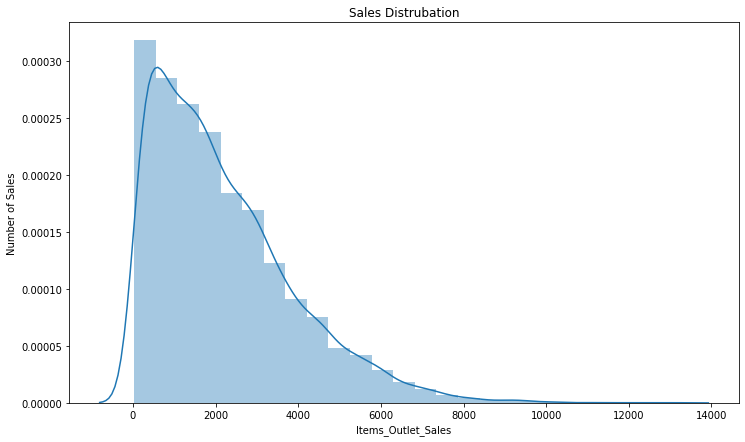

In [11]:
#Distributionn of the Target Variable : Item Outlet Sales

plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales ,bins=25)
plt.xlabel("Items_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Sales Distrubation")

In [12]:
num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

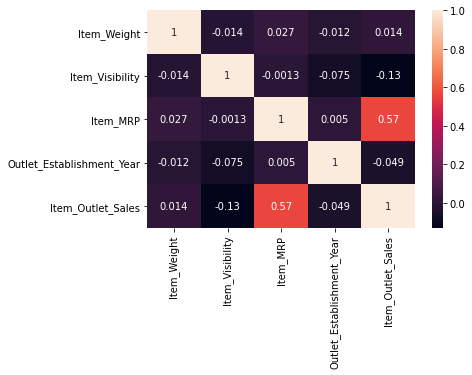

In [13]:
corr = num_features.corr()
sns.heatmap(corr , annot=True)

In [14]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

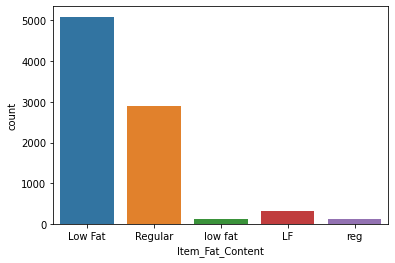

In [15]:
#Categorical Feature

#Distribution of Item_Fat_Count
sns.countplot(train.Item_Fat_Content)

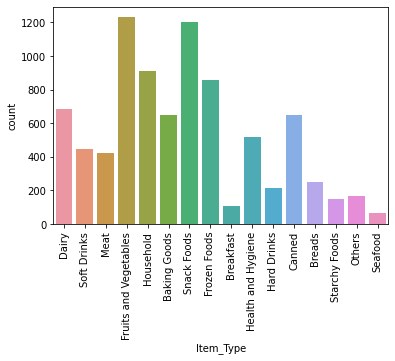

In [16]:
#Item Type

sns.countplot(train.Item_Type)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

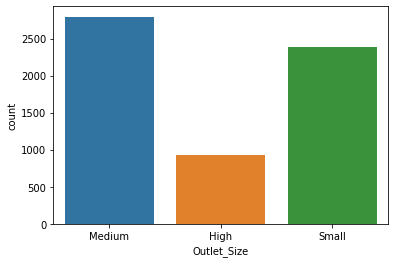

In [17]:
#outlet Size
sns.countplot(train.Outlet_Size)

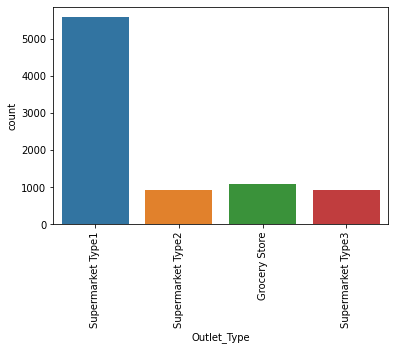

In [18]:
#Outlet Type

sns.countplot(train.Outlet_Type)
plt.xticks(rotation = 90)
plt.show()

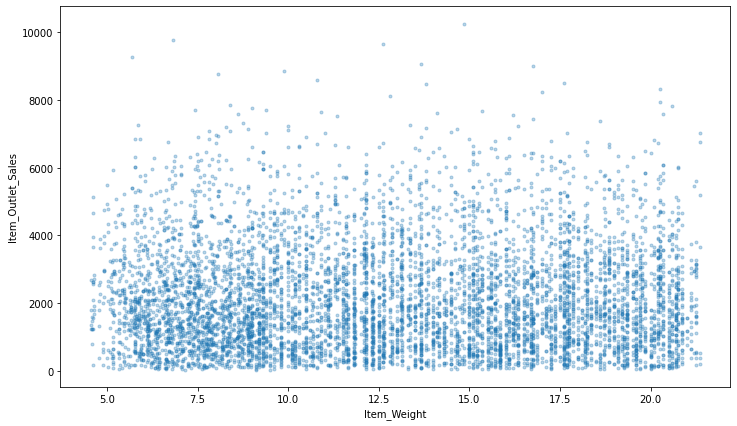

In [19]:
#Item Weight and Item_Outlet_Sales

plt.figure(figsize=(12,7))
plt.plot(train.Item_Weight,train.Item_Outlet_Sales,'.',alpha=0.3)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.show()

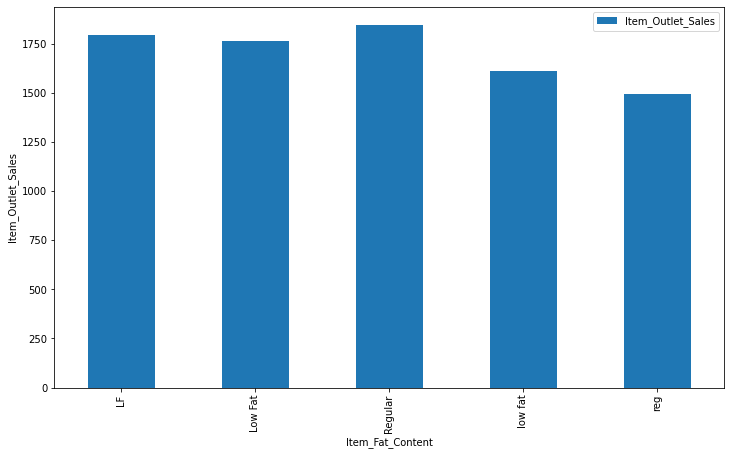

In [20]:
#item_fat_content on Sales

fat_content_bar = train.pivot_table(index='Item_Fat_Content' , values='Item_Outlet_Sales' , aggfunc=np.median)
fat_content_bar.plot(kind='bar',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show()

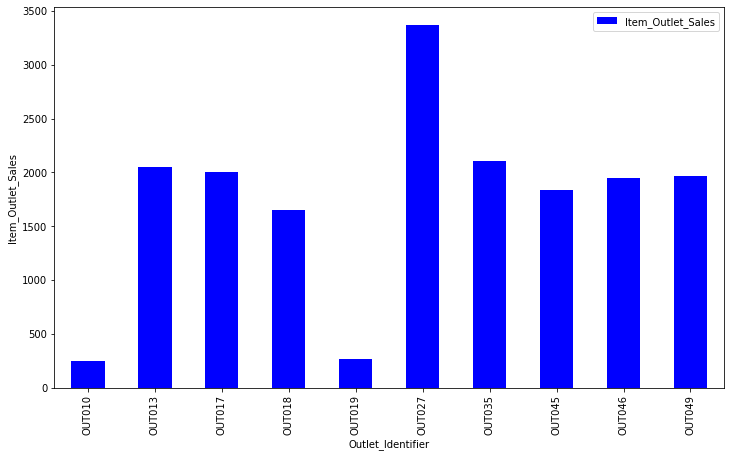

In [21]:
#outlet_indetifier on Item_outlet_sales

outlet_identifier_bar = train.pivot_table(index='Outlet_Identifier',values="Item_Outlet_Sales",aggfunc=np.median)
outlet_identifier_bar.plot(kind='bar' , color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

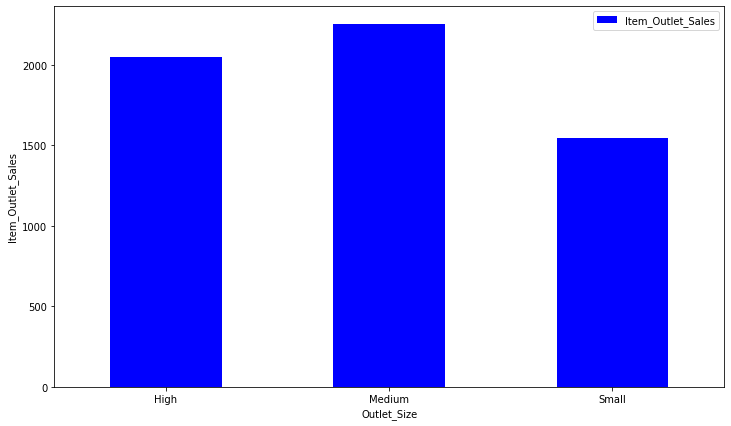

In [22]:
#Outlet_Size on Item_Outlet_Sales
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

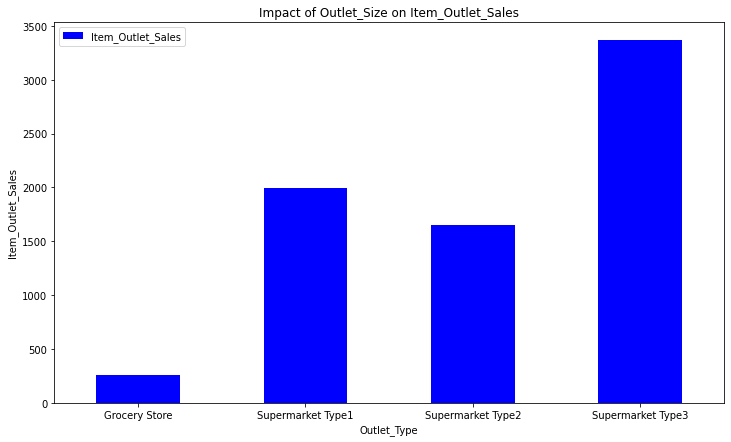

In [23]:
#Outlet_Type on Item_Outlet_Sales

Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

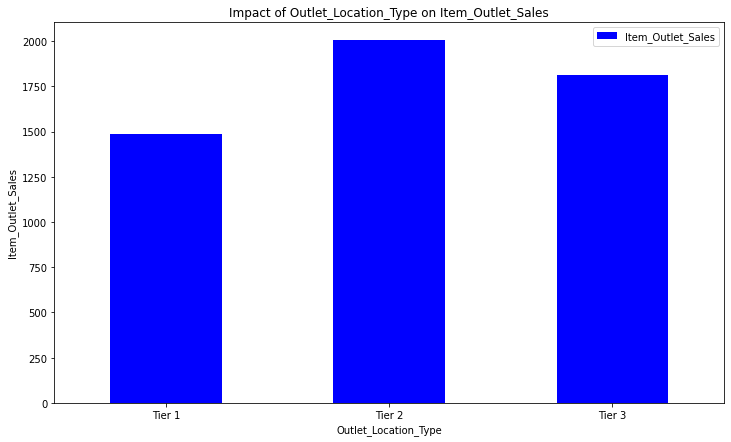

In [24]:
#Outlet_Location_Type on Item_Outlet_Sales

Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

### Data Preprocessing

In [25]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
#Item_Weight is numerical column so we fill it with Mean Imputation
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [30]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [31]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)


In [33]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [35]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [36]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [38]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [39]:
print('Original Categories:')
print(train['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(train['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [40]:
print('Original Categories:')
print(test['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(test['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [41]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [43]:
train.to_csv('clean dataset/train.csv')

In [44]:
test.to_csv('clean dataset/test.csv')

## Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
encoder = ['Item_Fat_Content' , 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in encoder:
    train[i] = le.fit_transform(train[i])

In [47]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


### Splitting the data

In [48]:
X = train.drop('Item_Outlet_Sales',axis=1)
Y = train['Item_Outlet_Sales']

In [49]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


In [50]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [51]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [52]:
print(X_train.shape,X_test.shape)

(6818, 9) (1705, 9)


In [53]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500000,0,0.089960,8,159.5604,2002,1,1,1
4148,12.857645,0,0.009535,13,64.5510,1985,1,2,3
7423,11.500000,0,0.017742,8,129.6626,2007,1,1,1
4836,10.195000,0,0.000000,5,143.1154,2007,1,1,1
944,21.000000,0,0.049264,13,195.0478,1987,0,2,1


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
X_train_std = sc.fit_transform(X_train)

In [56]:
X_test_std = sc.transform(X_test)

In [57]:
import joblib
joblib.dump(sc,r'C:\Users\Adil\Big Mart\models\sc.sav')

['C:\\Users\\Adil\\Big Mart\\models\\sc.sav']

## Model Training

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression(normalize=True)

In [60]:
model = lr.fit(X_train_std,y_train)

In [61]:
model.score(X_test_std,y_test)

0.5105951012871442

In [62]:
y_pred_lr = lr.predict(X_test_std)

In [63]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.5105951012871442
913.9765932853671
1196.837229562074


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [65]:
rf.fit(X_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [66]:
y_pred_rf= rf.predict(X_test_std)

In [67]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))


0.5551418086268864
814.2836837788853
1141.0685354506218


### DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

In [69]:
model = dt.fit(X_train_std,y_train)

In [70]:
model.score(X_test_std,y_test)

0.5848870946085934

In [71]:
y_pred_dt = dt.predict(X_test_std)

In [72]:
print(r2_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))


0.5848870946085934
776.1816895236884
1102.2600106791153


### Conclusion : DecisionTreeRegressor is giving the best result among all

In [178]:
joblib.dump(model,r'C:\Users\Adil\Big Mart\models\model.sav')

['C:\\Users\\Adil\\Big Mart\\models\\model.sav']